In [1]:
import json as json
import os
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def gatherJsons(dirs):
    jsons = []
    for dir in dirs:
        with open(dir+"/metadata.json") as f:
            jsons.append(json.load(f))
    return jsons


def gatherSolveTime(jsons, runs):
    x = np.empty((len(jsons) // runs, runs))
    for i, data in enumerate(jsons):
        x[(i // runs), (i % runs)] = data["residual log"][-1]["time"]
    return pd.DataFrame(x, columns=[str(i) for i in range(1, runs + 1)])


def innersolver(data, metadata):
    fig, ax = plt.subplots()
    for i in data:
        ax.plot(np.mean(data[i],axis=1),label=i) 
        ax.fill_between(x=range(len(data[i])),y1=np.min(data[i],axis=1),y2=np.max(data[i],axis=1), alpha=0.5)
    
    ax.set_ylabel('Solver execution time in seconds')
    ax.set_xlabel('discount factor')

    ax.set_xticks([i*24/6 for i in range(7)],labels=[str(0.02+i*0.96/6) for i in range(7)])

    ax.legend()

    # metadatashort = {
    #     key: metadata[key]
    #     for key in {
    #         "initial cost type",
    #         "number of actions",
    #         "number of states",
    #     }
    # }
    # fig.suptitle("Mdp with " + re.sub('"',"",re.sub(",", ",\n", json.dumps(metadatashort)))[1:-1],y=0.85,x=0.55)
    
    plt.show()



def findDirs(base, alphas, runs):
    """Helper function to return list of dirs with data after base

    Args:
        base (int): first name of dir
        n (int): number of dirs to find
    """
    dirs = []
    for i in range(alphas):
        for j in range(runs):
            dirs.append("../../data/" + base + str(i)+str(j))
    return dirs

def getinnerdata(name, alphas,runs):
    dirs = findDirs(name, alphas,runs)
    jsons = gatherJsons(dirs)
    return gatherSolveTime(jsons,runs)

In [2]:
dirs = findDirs("innersolver/bicgstab", 25,10)
jsons = gatherJsons(dirs)
data = gatherSolveTime(jsons,10)


In [3]:
dirs2 = findDirs("innersolver/gmres", 25,10)
jsons2 = gatherJsons(dirs2)
data2 = gatherSolveTime(jsons2,10)

In [4]:
dirs3 = findDirs("innersolver/richard", 25,10)
jsons3 = gatherJsons(dirs3)
data3 = gatherSolveTime(jsons3,10)

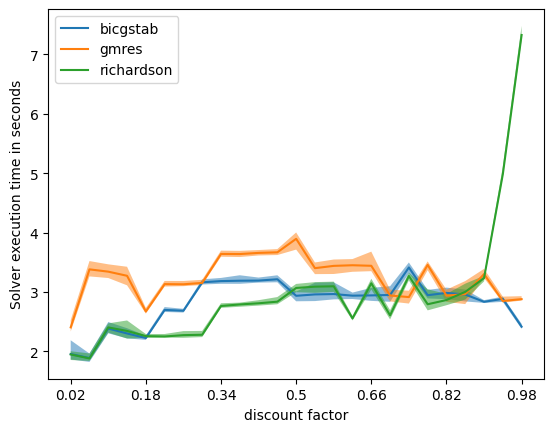

In [87]:
innersolver({"bicgstab":data,"gmres":data2,"richardson":data3},jsons[0])

In [6]:
print(dirs)
print(dirs2)
print(dirs3)

['../../data/22033907/bicgstab00', '../../data/22033907/bicgstab01', '../../data/22033907/bicgstab02', '../../data/22033907/bicgstab03', '../../data/22033907/bicgstab04', '../../data/22033907/bicgstab05', '../../data/22033907/bicgstab06', '../../data/22033907/bicgstab07', '../../data/22033907/bicgstab08', '../../data/22033907/bicgstab09', '../../data/22033907/bicgstab10', '../../data/22033907/bicgstab11', '../../data/22033907/bicgstab12', '../../data/22033907/bicgstab13', '../../data/22033907/bicgstab14', '../../data/22033907/bicgstab15', '../../data/22033907/bicgstab16', '../../data/22033907/bicgstab17', '../../data/22033907/bicgstab18', '../../data/22033907/bicgstab19', '../../data/22033907/bicgstab20', '../../data/22033907/bicgstab21', '../../data/22033907/bicgstab22', '../../data/22033907/bicgstab23', '../../data/22033907/bicgstab24', '../../data/22033907/bicgstab25', '../../data/22033907/bicgstab26', '../../data/22033907/bicgstab27', '../../data/22033907/bicgstab28', '../../data/2